-10 -59.2854719347082


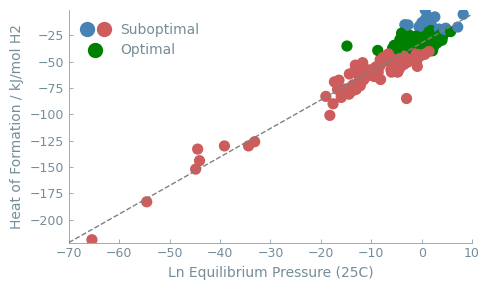

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

fig, ax = plt.subplots(figsize = (5,3), tight_layout = True)
OPTIMAL_COLOUR = 'g'
HIGH_COLOR = 'steelblue'
LOW_COLOR = 'indianred'

SIZE= 10
FILENAME = 'Hydrides.csv'

df = pd.read_csv(FILENAME)

colors= [HIGH_COLOR, OPTIMAL_COLOUR, LOW_COLOR]
cmap = ListedColormap(colors)

ax.scatter(df['ln_pressure'], df['Heat_of_Formation_kJperMolH2'], c= df['3bin_limit'], vmin = 0, vmax=len(colors), cmap=cmap, s = SIZE*5)

df = df[df['ln_pressure'] != 0]
df.dropna(subset=df.columns, inplace=True)

a= df['ln_pressure']
b = df['Heat_of_Formation_kJperMolH2']
# Check for missing or invalid data (NaN or Inf)
a = np.array(a)
b = np.array(b)

# Check for NaN or Inf in a or b and remove corresponding entries
nan_mask = np.isnan(a) | np.isnan(b)
inf_mask = np.isinf(a) | np.isinf(b)

if np.any(nan_mask) or np.any(inf_mask):
    a = a[~nan_mask & ~inf_mask]
    b = b[~nan_mask & ~inf_mask]

z = np.polyfit(a, b, 1)
p  = np.poly1d(z)
test_pressure = -10
print(test_pressure, p(test_pressure))
x_fit = np.linspace(-70, 10)
y_fit = [p(i) for i in x_fit]

ax.plot(x_fit, y_fit, '--', c ='gray')


suboptimal_high =Line2D([0], [0], marker='o', color=HIGH_COLOR, markersize = SIZE, linewidth=0)
suboptimal_low = Line2D([0], [0], marker='o', color= LOW_COLOR, markersize = SIZE, linewidth=0)
optimal = Line2D([0], [0], marker='o', color= OPTIMAL_COLOUR, markersize = SIZE, linewidth=0)

FONTSIZE = 10
# Create the figure
ax.legend([(suboptimal_high, suboptimal_low), (optimal)], ['Suboptimal', 'Optimal'], numpoints = 1, handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize = FONTSIZE)

ax.set_xlabel('Ln Equilibrium Pressure (25C)', fontsize = FONTSIZE)
ax.set_ylabel('Heat of Formation / kJ/mol H2', fontsize = FONTSIZE)

ax.tick_params(labelsize=FONTSIZE*0.9)  # Increase the font size here (change 12 to your desired size)

plt.savefig('hydrides_linearplot.pdf')
plt.show()